<a href="https://colab.research.google.com/github/mailazorzan/iris_classification/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris - Classification

*  **True negatives**: **correctly** predicted **negatives** (zeros)
*  **True positives**: **correctly** predicted **positives** (ones)
*  **False negatives**: **incorrectly** predicted **negatives** (zeros)
*  **False positives**: **incorrectly** predicted **positives** (ones)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Importando o dataset

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, names=names)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

# EDA

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

## Train and Test Split





In [7]:
df_train, df_test = train_test_split(df, test_size = 0.4, stratify = df['species'], random_state = 42)

## Histograms and Boxplots

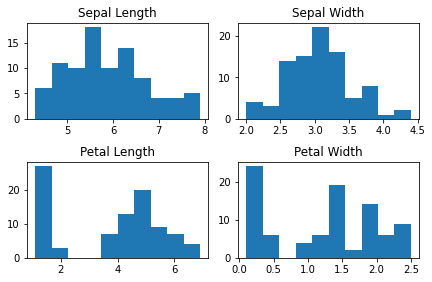

In [8]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(df_train['sepal_length'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(df_train['sepal_width'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(df_train['petal_length'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(df_train['petal_width'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

Por meio dos histogramas, podemos observar que tanto para petal_legth quanto para petal_width parece haver um grupo de pontos de dados com valores muito pequenos. Assim, sugere-se que podemos ter grupos diferentes nesses dados.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdf642c810>,
      dtype=object)

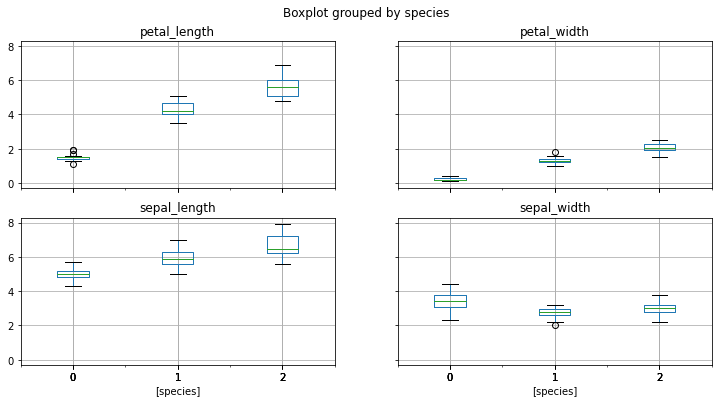

In [22]:
# Box plot grid
df_train.boxplot(by="species", figsize=(12, 6))

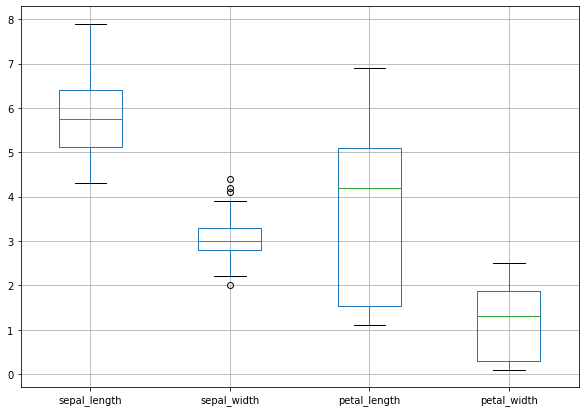

In [9]:
plt.figure(figsize = (10, 7))
df_train.boxplot()

[]

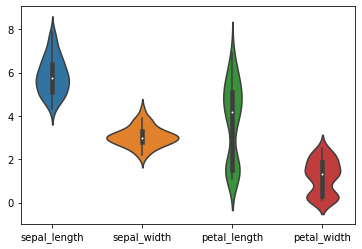

In [10]:
sns.violinplot(data=df_train)
plt.plot()

[]

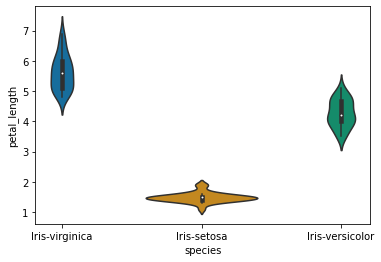

In [11]:
sns.violinplot(x=df_train["species"], y=df_train["petal_length"], palette = 'colorblind')
plt.plot()

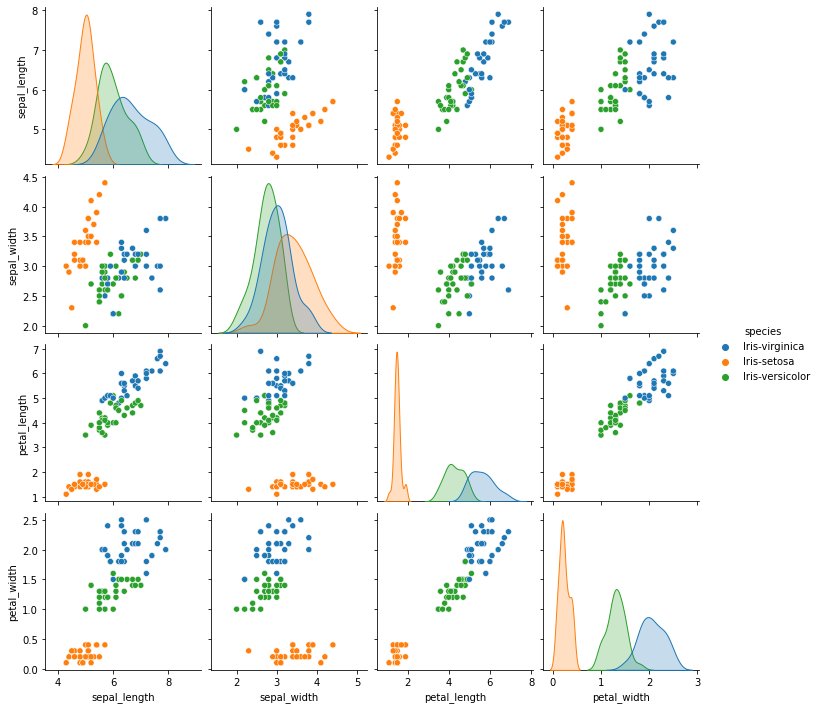

In [12]:
sns.pairplot(data=df_train, kind='scatter', hue='species') 

Analisando os plots acima, podemos observar que algumas variáveis parecem estar altamente correlacionadas, por exemplo: petal_length e petal_width. As medidas das pétalas separam as diferentes espécies melhor do que as sépalas.

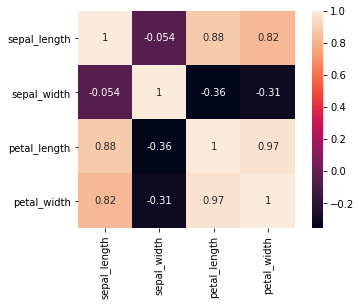

In [13]:
corrmat = df_train.corr()
sns.heatmap(corrmat, annot = True, square = True);

Pela matriz de correlação podemos perceber que as medidas das pétalas tem uma correlação altamente positiva, enquanto as das sépalas não estão correlacionadas. Também podemos ver que as features das pétalas tem uma correlação relativamente alta com sepal_length, mas não com sepal_width.

In [14]:
df_train

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,Iris-virginica
6,4.6,3.4,1.4,0.3,Iris-setosa
94,5.6,2.7,4.2,1.3,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
26,5.0,3.4,1.6,0.4,Iris-setosa
...,...,...,...,...,...
37,4.9,3.1,1.5,0.1,Iris-setosa
89,5.5,2.5,4.0,1.3,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa
99,5.7,2.8,4.1,1.3,Iris-versicolor


## Preparando dados para treinamento

In [15]:
# Tratando a variável categórica
aux_train = df_train.species.astype('category')
y_train = aux_train.cat.codes
df_train['species'] = y_train.copy()

aux_test = df_test.species.astype('category')
y_test = aux_test.cat.codes
df_test['species'] = y_test.copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df_train

,sepal_length,sepal_width,petal_length,petal_width,species
130,7.4,2.8,6.1,1.9,2
6,4.6,3.4,1.4,0.3,0
94,5.6,2.7,4.2,1.3,1
96,5.7,2.9,4.2,1.3,1
26,5.0,3.4,1.6,0.4,0
...,...,...,...,...,...
37,4.9,3.1,1.5,0.1,0
89,5.5,2.5,4.0,1.3,1
33,5.5,4.2,1.4,0.2,0
99,5.7,2.8,4.1,1.3,1


In [23]:
X_train = df_train[['sepal_length','sepal_width','petal_length','petal_width']].copy()
y_train = df_train['species'].copy()

X_test = df_test[['sepal_length','sepal_width','petal_length','petal_width']].copy()
y_test = df_test['species'].copy()

# Treinamentos e predições

### Regressão Logistica

In [24]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.90      0.95      0.93        20
           2       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

[[20  0  0]
 [ 0 19  1]
 [ 0  2 18]]
accuracy is 0.95


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### KNN

In [25]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.91      1.00      0.95        20
           2       1.00      0.90      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

[[20  0  0]
 [ 0 20  0]
 [ 0  2 18]]
accuracy is 0.9666666666666667


### SVM

In [26]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.95      0.95      0.95        20
           2       0.95      0.95      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60

[[20  0  0]
 [ 0 19  1]
 [ 0  1 19]]
accuracy is 0.9666666666666667


### Decision Tree

In [27]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.90      0.95      0.93        20
           2       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

[[20  0  0]
 [ 0 19  1]
 [ 0  2 18]]
accuracy is 0.95
